<a href="https://colab.research.google.com/github/TobiBu/graddays/blob/main/day_5/notebooks/simple_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Example of a Simulation in jf1uids

## Imports

In [ ]:
import jax.numpy as jnp

!pip install jf1uids

from jf1uids import SPHERICAL
from jf1uids import SimulationConfig
from jf1uids import SimulationParams
from jf1uids import get_helper_data
from jf1uids import primitive_state
from jf1uids import time_integration

import matplotlib.pyplot as plt

# set device to CPU
import jax
jax.config.update("jax_platform_name", "cpu")

## Simulation Setup

Let us set up a very simple simulation, mostly with default parameters.

First we get the configuration of the simulation, which contains parameters that typically do not change between simulations, changing which requires (just-in-time)-recompilation.

In [ ]:
config = SimulationConfig(
    alpha_geom = SPHERICAL,
    num_cells = 1001,
)

Next we setup the simulation parameters, things we might vary

In [ ]:
params = SimulationParams(
    t_end = 0.2 # the typical value for a shock test
)

With this we generate some helper data, like the cell centers etc.

In [ ]:
helper_data = get_helper_data(config)

Next we setup the shock initial conditions, namely
\begin{equation}
\left(\begin{array}{l}
\rho \\
u \\
p
\end{array}\right)_L=\left(\begin{array}{l}
1 \\
0 \\
1
\end{array}\right), \quad\left(\begin{array}{l}
\rho \\
u \\
p
\end{array}\right)_R=\left(\begin{array}{c}
0.125 \\
0 \\
0.1
\end{array}\right)
\end{equation}
with seperation at $x=0.5$.

In [ ]:
# setup the shock initial fluid state in terms of rho, u, p
shock_pos = 0.5
r = helper_data.geometric_centers
rho = jnp.where(r < shock_pos, 1.0, 0.125)
u = jnp.zeros_like(r)
p = jnp.where(r < shock_pos, 1.0, 0.1)

# get initial state
initial_state = primitive_state(rho, u, p)

## Running the simulation

In [ ]:
final_state = time_integration(initial_state, config, params, helper_data)
rho_final, u_final, p_final = final_state

## Visualization

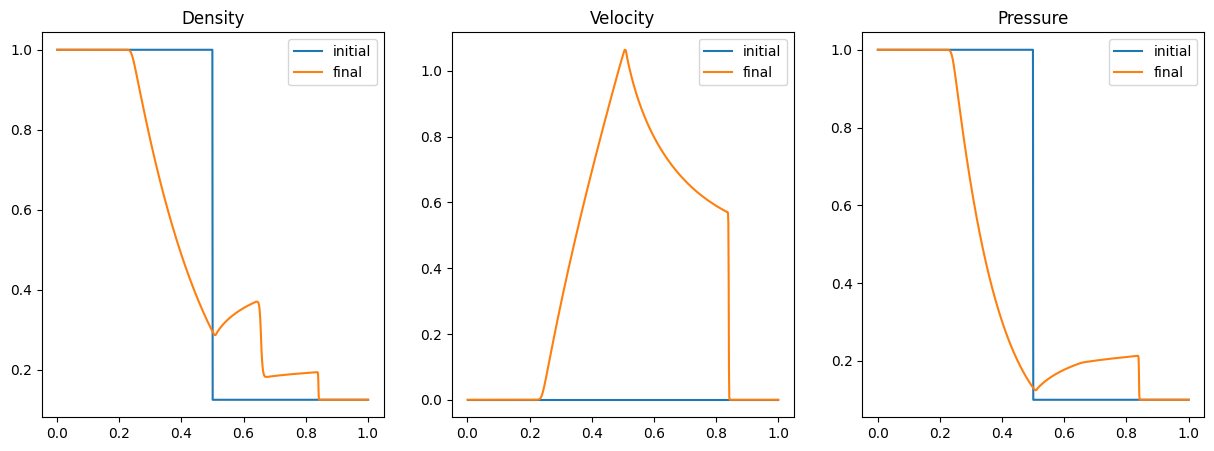

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(r, rho, label='initial')
axs[0].plot(r, rho_final, label='final')
axs[0].set_title('Density')
axs[0].legend()

axs[1].plot(r, u, label='initial')
axs[1].plot(r, u_final, label='final')
axs[1].set_title('Velocity')
axs[1].legend()

axs[2].plot(r, p, label='initial')
axs[2].plot(r, p_final, label='final')
axs[2].set_title('Pressure')
axs[2].legend()